In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, f1_score
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import pandas as pd
import os
train = pd.read_csv(os.path.join(os.getcwd().replace('model', ''), 'data/processed_train.csv') )
test = pd.read_csv(os.path.join(os.getcwd().replace('model', ''), 'data/processed_test.csv') )
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27390 entries, 0 to 27389
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27390 non-null  object
 1   sentiment  27390 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 428.1+ KB


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
def model_eval(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'Accuracy Score is : {accuracy_score(y_test,y_pred)}')
    print(f'Classification_report')
    print(classification_report(y_test,y_pred))
    print(f'Confusion Matrix')
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

In [4]:
def model_train(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return f1_score(y_test, y_pred, average="weighted")

In [5]:
def tfidf_vectorizer():
    vec=TfidfVectorizer(max_features=10000)
    x_train=vec.fit_transform(train['text']).toarray()
    x_test=vec.transform(test['text']).toarray()
    y_train=train['sentiment']
    y_test=test['sentiment']
    return x_train, y_train, x_test, y_test

def bog_vectorizer():
    vec = CountVectorizer(max_features=10000)
    x_train = vec.fit_transform(train['text']).toarray()
    x_test = vec.transform(test['text']).toarray()
    y_train = train['sentiment']
    y_test = test['sentiment']
    return x_train, y_train, x_test, y_test

def binary_vectorizer():
    vec = CountVectorizer(binary=True, max_features=10000)
    x_train = vec.fit_transform(train['text']).toarray()
    x_test = vec.transform(test['text']).toarray()
    y_train = train['sentiment']
    y_test = test['sentiment']
    return x_train, y_train, x_test, y_test

In [ ]:
best_f1 = 0
C= [0.1, 1, 10, 100]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for c in C:
    for kernel in kernels:
        # TF-IDF Vectorization
        x_train, y_train, x_test, y_test = tfidf_vectorizer()
        svc = SVC(C=c, kernel=kernel)
        f1 = model_train(svc)
        if f1 > best_f1:
            best_f1 = f1
            best_c = c
            best_kernel = kernel
            best_vectorization = 'TF-IDF'
        print(f"f1 score is {f1} with c = {c}, kernel = {kernel}, vectorization=TF-IDF")
        # Bag of Words Vectorization    
        x_train, y_train, x_test, y_test = bog_vectorizer()
        svc = SVC(C=c, kernel=kernel)
        f1 = model_train(svc)
        if f1 > best_f1:
            best_f1 = f1
            best_c = c
            best_kernel = kernel
            best_vectorization = 'Bag of Words'
        print(f"f1 score is {f1} with c = {c}, kernel = {kernel}, vectorization=Bag of Words")
        # Binary Vectorization
        x_train, y_train, x_test, y_test = binary_vectorizer()
        svc = SVC(C=c, kernel=kernel)
        f1 = model_train(svc)
        if f1 > best_f1:
            best_f1 = f1
            best_c = c
            best_kernel = kernel
            best_vectorization = 'Binary'
        print(f"f1 score is {f1} with c = {c}, kernel = {kernel}, vectorization=Binary")

print(f"Best f1 score is {best_f1} with c = {best_c}, kernel = {best_kernel}, vectorization={best_vectorization}")

Accuracy Score is : 0.709741550695825
Classification_report
              precision    recall  f1-score   support

           0       0.76      0.61      0.68      1000
           1       0.63      0.79      0.70      1418
           2       0.81      0.69      0.75      1103

    accuracy                           0.71      3521
   macro avg       0.74      0.70      0.71      3521
weighted avg       0.73      0.71      0.71      3521

Confusion Matrix


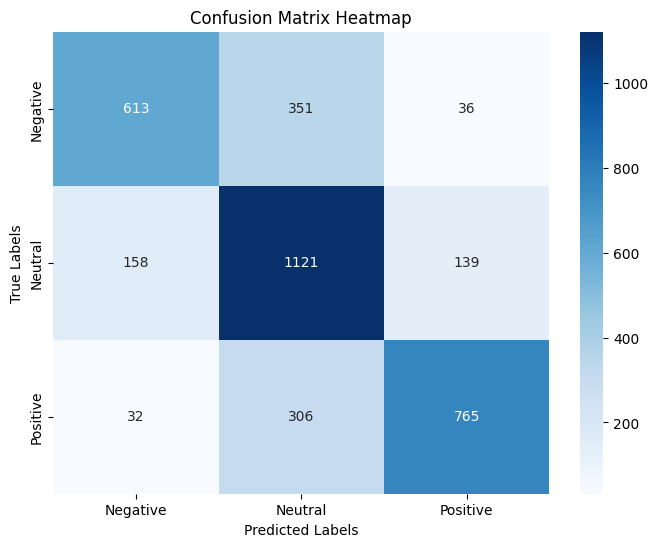

In [7]:
best_model = SVC(C = 1, kernel = 'rbf')
x_train, y_train, x_test, y_test = tfidf_vectorizer()
model_eval(best_model)